<a href="https://colab.research.google.com/github/Namratabhartiya97/IE7374-Project-Group-13/blob/main/IE_7374_Project_Code_Group_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group 13: Namrata Bhartiya, Richa Talaty**

**Goal:**
To use the Census Income dataset to classify whether a person has an income of $50K per year or 
more.


**Dataset Description**
Link - https://archive.ics.uci.edu/ml/datasets/Census+Income

The US Adult Census dataset is a repository of 48,842 entries extracted from the 1994 US 
Census database. This dataset comprises a total of 14 attributes. There are 5 attributes which 
are continuous in nature, and 8 attributes which are categorical in nature. The target variable 
is Income, which is binary-categorical in nature with categories ‘<=50 K’ and ‘>50 K’.


**Attributes**

Continuous attributes include: 
1. age: age of the individual
2. fnlwgt: represents how many people have the same list of features
3. education-num: the highest level of education achieved in numerical form.
4. capital-gain: capital gains for an individual
5. capital-loss: capital loss for an individual
6. hours-per-week: the hours an individual has reported to work per week


Categorical variables include:
1. workclass: a general term to represent the employment status of an individual. 
[Domain - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, 
State-gov, Without-pay, Never-worked]

2. education: the highest level of education achieved by an individual. 
[Domain - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool]

3. marital-status: marital status of an individual. 
Married--civ--spouse corresponds to a civilian spouse 
Married--AF--spouse is a spouse in the Armed Forces. 
[Domain - Married-civ-spouse, Divorced, Never-married, 
Separated, Widowed, Married-spouse-absent, Married-AF-spouse]

4. occupation: the general type of occupation of an individual. 
[Domain - Techsupport, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, 
Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, 
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces]

5. relationship: represents how this individual is related to others. 
[Domain -Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried]

6. race: [Domain - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black]

7. sex: [Domain - Female, Male]

8. native-country: 
[Domain - United-States, Cambodia, England, Puerto-Rico, 
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, 
China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, 
Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, 
Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, 
Yugoslavia, El-Salvador, Trinadad &Tobago, Peru, Hong, Holand-Netherlands]

In [ ]:
# from google.colab import files
# file = files.upload()

Saving svm_utils.py to svm_utils (1).py
Saving TestData.xlsx to TestData (1).xlsx
Saving TrainData.xlsx to TrainData (1).xlsx


# **Importing the relevant Libraries**

In [1]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from svm_utils import  *
from scipy import optimize
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy.stats import mode
from sklearn import neighbors
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
from scipy import stats
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
import sys
from sklearn.preprocessing import StandardScaler
import collections
from sklearn.metrics import roc_curve, auc

# **Reading and Understanding the Dataset**


In [ ]:
# Setting the maximum number of columns displayed to all
pd.set_option('expand_frame_repr', False)

`The census income dataset was already segregated into train and test sets, such that the train set had 32561 records(67%) and 15 attributes, and the test set had 16281(33%) records.`

In [ ]:
# Reading the train and test dataset and storing it in separate dataframes
train_data = pd.read_excel('TrainData.xlsx')
test_data = pd.read_excel('TestData.xlsx')

# Checking the dimensions of the dataset  
print("Dimensions of the Train dataset :",train_data.shape)
print("Dimensions of the Test dataset :",test_data.shape,"\n")

Dimensions of the Train dataset : (32561, 15)
Dimensions of the Test dataset : (16281, 15) 



##### Please ensure that the svm.utils.py file is included in the same folder in order for SVM to execute correctly

In [ ]:
# Reading the first 3 observations of the train and test dataset 
print("Train data:\n",train_data.head(3))
print("\nTest data:\n",test_data.head(3))

Train data:
    age          workclass  fnlwgt   education  education-num       marital-status          occupation    relationship    race    sex  capital-gain  capital-loss  hours-per-week  native-country income
0   39          State-gov   77516   Bachelors             13        Never-married        Adm-clerical   Not-in-family   White   Male          2174             0              40   United-States  <=50K
1   50   Self-emp-not-inc   83311   Bachelors             13   Married-civ-spouse     Exec-managerial         Husband   White   Male             0             0              13   United-States  <=50K
2   38            Private  215646     HS-grad              9             Divorced   Handlers-cleaners   Not-in-family   White   Male             0             0              40   United-States  <=50K

Test data:
    age   workclass  fnlwgt    education  education-num       marital-status          occupation relationship    race    sex  capital-gain  capital-loss  hours-per-week  nativ

`The dataset was comprised of 6 numeric attributes and 9 categorical attributes. The summary statistics of the numeric attributes of both the train and test data has been shown below.`

In [ ]:
# Checking the statistics of the numeric attributes of the train dataset
print("Train data:\n",train_data.describe().T, "\n\n") 

# Analyzing the datatypes of each attribute of the train dataset
print(train_data.info())

Train data:
                   count           mean            std      min       25%       50%       75%        max
age             32561.0      38.581647      13.640433     17.0      28.0      37.0      48.0       90.0
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0  178356.0  237051.0  1484705.0
education-num   32561.0      10.080679       2.572720      1.0       9.0      10.0      12.0       16.0
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0       0.0       0.0    99999.0
capital-loss    32561.0      87.303830     402.960219      0.0       0.0       0.0       0.0     4356.0
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0      40.0      45.0       99.0 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass 

In [ ]:
# Checking the statistics of the numeric attributes of the test dataset
print("Test data:\n",test_data.describe().T,"\n\n") 

# Analyzing the datatypes of each attribute of the test dataset
print(test_data.info())

Test data:
                   count           mean            std      min       25%       50%       75%        max
age             16281.0      38.767459      13.849187     17.0      28.0      37.0      48.0       90.0
fnlwgt          16281.0  189435.677784  105714.907671  13492.0  116736.0  177831.0  238384.0  1490400.0
education-num   16281.0      10.072907       2.567545      1.0       9.0      10.0      12.0       16.0
capital-gain    16281.0    1081.905104    7583.935968      0.0       0.0       0.0       0.0    99999.0
capital-loss    16281.0      87.899269     403.105286      0.0       0.0       0.0       0.0     3770.0
hours-per-week  16281.0      40.392236      12.479332      1.0      40.0      40.0      45.0       99.0 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass  

`There were 24720 instances in the train data for income <= $50K and 7841 instances for income > $50K. Similarly, the test set had 12435 instances for income  <= $50K and 3846 instances for income > $50K. This clearly depicted that there is a class-imbalance in the census dataset which was required to be handled before the model building phase. `

In [ ]:
# Checking the count of classes in the target variable 'Income'
print("Train data:")
print(train_data.income.value_counts())

print("\nTest data:")
print(test_data.income.value_counts())

Train data:
<=50K    24720
>50K      7841
Name: income, dtype: int64

Test data:
<=50K    12435
>50K      3846
Name: income, dtype: int64


`The categorical and numerical attributes were identified and segregated from each other for performing separate Explaratory data analysis and pre-processing steps. `

In [ ]:
# Identifying the numeric variables and categorical variables in the train and test data
print("Train data:")
df_train_categorical = []
df_train_numerical = []
for x in train_data.columns:
  if (train_data[x].dtypes == np.object):
    df_train_categorical.append(x)
  else:
    df_train_numerical.append(x)

print("Categorical columns :",df_train_categorical)
print("Numerical columns   :",df_train_numerical)

print("\nTest data:")
df_test_categorical = []
df_test_numerical = []
for x in test_data.columns:
  if (test_data[x].dtypes == np.object):
    df_test_categorical.append(x)
  else:
    df_test_numerical.append(x)

print("Categorical columns :",df_test_categorical)
print("Numerical columns   :",df_test_numerical)

Train data:
Categorical columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical columns   : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Test data:
Categorical columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical columns   : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


`From the below results, it was evident that this dataset contains missing values which have been represented using '?'. First, we converted those values to 'NaN' to evaluate the percentage of missing values. As there would have been a considerable amount of data loss if we dropped the features directly. Therefore, we converted the missing values to a separate category 'Not Known' to ensure data retention before proceeding with further analysis.  `

In [ ]:
# Identifying the categorical variables present in the dataset
df_train_cat = train_data.loc[:,df_train_categorical]

# Checking the dimension of the categorical variables
print("Dimensions of the categorical variables in Train Data: ",df_train_cat.shape,"\n")

# Computing the unique values of each of the categorical variables
for column in df_train_cat:
    print(column,': \n',train_data[column].unique(), "\n\n")

Dimensions of the categorical variables in Train Data:  (32561, 9) 

workclass : 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


education : 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


marital-status : 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 


occupation : 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 


relationship : 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 


race : 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Ind

In [ ]:
# This dataset has missing values which are represented using '?', therefore, replacing these values with 'NaN' to evaluate percentage of missing values

df_train = train_data.replace({' ?': np.NaN})
df_test = test_data.replace({' ?': np.NaN})

In [ ]:
# Computing the percentage of missing values for each attribute of the train and test dataset

print("Percentage of missing values in the Train data:\n",round(100*(df_train.isnull().sum()/len(df_train))),2)
print("\nPercentage of missing values in the Test data:\n",round(100*(df_test.isnull().sum()/len(df_test))),2)

Percentage of missing values in the Train data:
 age               0.0
workclass         6.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        6.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    2.0
income            0.0
dtype: float64 2

Percentage of missing values in the Test data:
 age               0.0
workclass         6.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        6.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    2.0
income            0.0
dtype: float64 2


In [ ]:
# This dataset has missing values which are represented using '?', therefore, replacing these values with 'Not Known'
train_data = train_data.replace({' ?': "Not Known"})
test_data = test_data.replace({' ?': "Not Known"})

In [ ]:
# Computing the percentage of missing values for each attribute of the train and test dataset after replacing '?' with 'Not Known' category

print("Percentage of missing values in the Train data:\n",round(100*(train_data.isnull().sum()/len(df_train))),2)
print("\nPercentage of missing values in the Test data:\n",round(100*(test_data.isnull().sum()/len(df_test))),2)

Percentage of missing values in the Train data:
 age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64 2

Percentage of missing values in the Test data:
 age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64 2


# **Exploratory Data Analysis**

### **Univariate Analysis of the Numeric Variables**

From the below figures, it is evident that all the numeric variables of this dataset are not normally distributed or are skewed in nature, which is also the case with most real-world data. 
The Age attributes shows that the highest frequency of people receiving income belong to the Age group of 18 to 45 years and mostly work full-time between 30 to 40 hours per week . 

Train data
Datatype is int64
Missing values are 0 

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


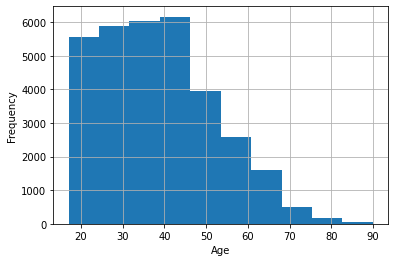

In [ ]:
# age column
print('\033[1m' + "Train data" + '\033[0m')
print("Datatype is", train_data['age'].dtype)
print("Missing values are", train_data['age'].isnull().sum(),"\n")
print(train_data['age'].describe())
train_data['age'].hist()
plt.xlabel('Age')
plt.ylabel("Frequency") 
plt.show()   

Train data:

Datatype is int64
Missing values are 0
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


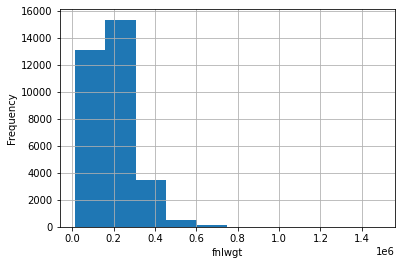

In [ ]:
# fnlwgt column
print('\033[1m' + "Train data:\n" + '\033[0m')
print("Datatype is", train_data['fnlwgt'].dtype)
print("Missing values are", train_data['fnlwgt'].isnull().sum())
print(train_data['fnlwgt'].describe())
train_data['fnlwgt'].hist()
plt.xlabel('fnlwgt')
plt.ylabel("Frequency") 
plt.show()   

Train data
Datatype is int64
Missing values are 0


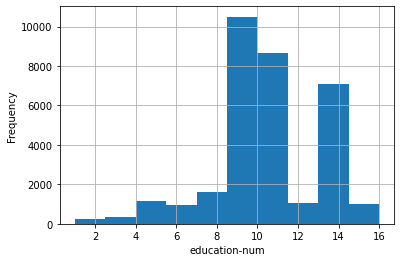

In [ ]:
# education-num column
print('\033[1m' + "Train data" + '\033[0m')
print("Datatype is", train_data['education-num'].dtype)
print("Missing values are", train_data['education-num'].isnull().sum())
train_data['education-num'].hist()
plt.xlabel('education-num')
plt.ylabel("Frequency") 
plt.show()   

Train data:

Datatype is int64
Missing values are 0
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


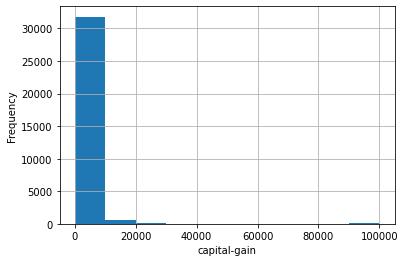

In [ ]:
# capital-gain column
print('\033[1m' + "Train data:\n" + '\033[0m')
print("Datatype is", train_data['capital-gain'].dtype)
print("Missing values are", train_data['capital-gain'].isnull().sum())
print(train_data['capital-gain'].describe())
train_data['capital-gain'].hist()
plt.xlabel('capital-gain')
plt.ylabel("Frequency") 
plt.show()    

Train data:

Datatype is int64
Missing values are 0
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


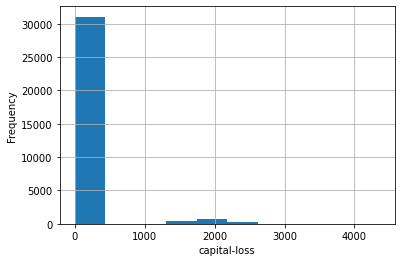

In [ ]:
# capital-loss column
print('\033[1m' + "Train data:\n" + '\033[0m')
print("Datatype is", train_data['capital-loss'].dtype)
print("Missing values are", train_data['capital-loss'].isnull().sum())
print(train_data['capital-loss'].describe())
train_data['capital-loss'].hist()
plt.xlabel('capital-loss')
plt.ylabel("Frequency") 
plt.show()   

Train data
Datatype is int64
Missing values are 0 

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


Text(0, 0.5, 'Frequency')

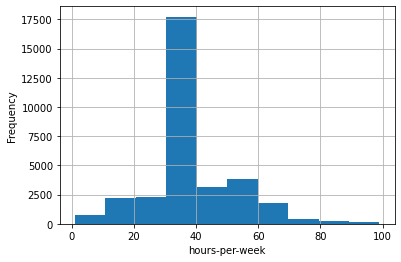

In [ ]:
# hours-per-week column
print('\033[1m' + "Train data" + '\033[0m')
print("Datatype is", train_data['hours-per-week'].dtype)
print("Missing values are", train_data['hours-per-week'].isnull().sum(),"\n")
print(train_data['hours-per-week'].describe())
train_data['hours-per-week'].hist()
plt.xlabel('hours-per-week')
plt.ylabel("Frequency") 

### **Univariate Analysis of the Categorical Variables**

Observations:

1. The Private workclass represents the highest records where income<=50K and highest records for Income>50K as compared to the other workclass categories. 

2. HS-grad Education type has highest records for income<=50K, and highest records for Income>50K, followed by those of Some-College. 

3. Never-Married marital status type has highest records for income<=50K and highest records for Income>50K, followed by Married-civ-spouse and Divorced. 

4. Admin-clerical staff of occupation type has highest records for income<=50K and highest records for Income>50K, followed by Craft-repair and other-services. 

5. Most people not in a family tend to have a higher income of <=50K than husbands and wives, and a high number of husbands have an income >50K. 

6. Based on race types, the White population have the highest income compared to other race types, and most frequently were observed to have an income <=50K, followed by the Black population. 

7. As compared to other countries, it was observed that the people of United States had the highest income, mostly <=50K, followed by Mexico. 


Train data:

Datatype is object
Missing values are 0 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Not Known             1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


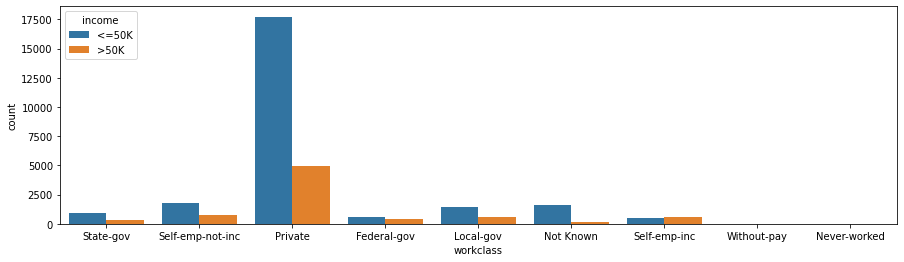

In [ ]:
# workclass column
print('\033[1m'+ "Train data:\n" + '\033[0m')
print("Datatype is", train_data['workclass'].dtype)
print("Missing values are", train_data['workclass'].isnull().sum(),"\n")
print(train_data['workclass'].value_counts())
train_data['workclass'] = train_data['workclass'].str.lstrip()

plt.figure(figsize=(15,4))
sns.countplot(x='workclass', data=train_data, hue='income')
plt.show()

Train data
Datatype is object
Missing values are 0 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


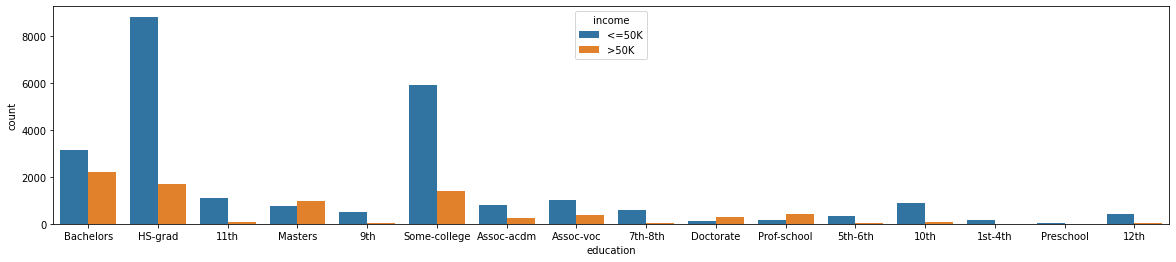

In [ ]:
# education column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['education'].dtype)
print("Missing values are", train_data['education'].isnull().sum(),"\n")
print(train_data['education'].value_counts())
train_data['education'] = train_data['education'].str.lstrip()

plt.figure(figsize=(20,4))
sns.countplot(x='education', data=train_data, hue='income')
plt.show()

Train data
Datatype is object
Missing values are 0 

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


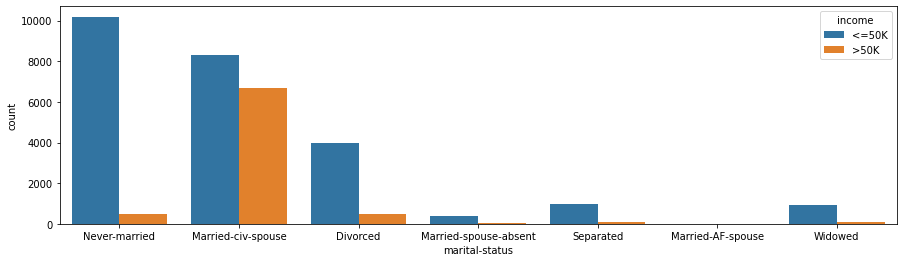

In [ ]:
# marital-status column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['marital-status'].dtype)
print("Missing values are", train_data['marital-status'].isnull().sum(),"\n")
print(train_data['marital-status'].value_counts())
train_data['marital-status'] = train_data['marital-status'].str.lstrip()

plt.figure(figsize=(15,4))
sns.countplot(x='marital-status', data=train_data, hue='income')
plt.show()

Train data
Datatype is object
Missing values are 0 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Not Known             1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


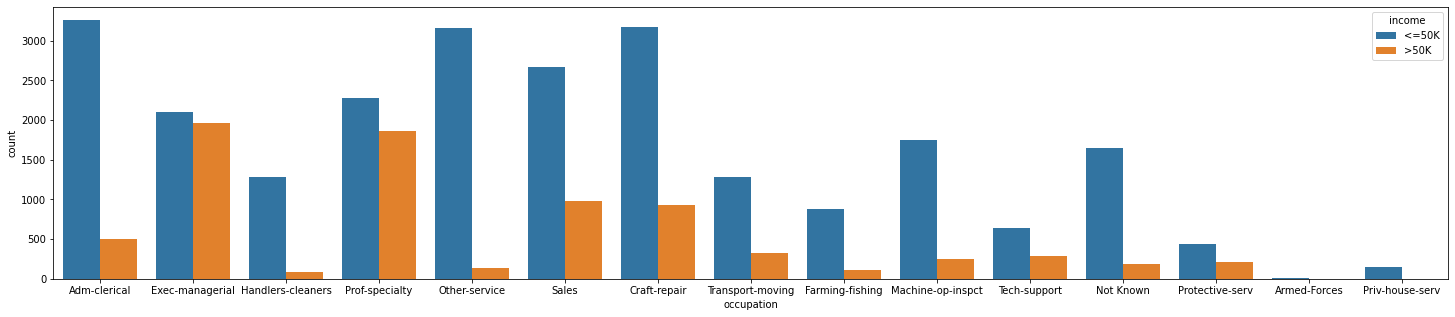

In [ ]:
# occupation column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['occupation'].dtype)
print("Missing values are", train_data['occupation'].isnull().sum(),"\n")
print(train_data['occupation'].value_counts())
train_data['occupation'] = train_data['occupation'].str.lstrip()

plt.figure(figsize=(25,5))
sns.countplot(x='occupation', data=train_data, hue='income')
plt.show()

Train data
Datatype is object
Missing values are 0
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


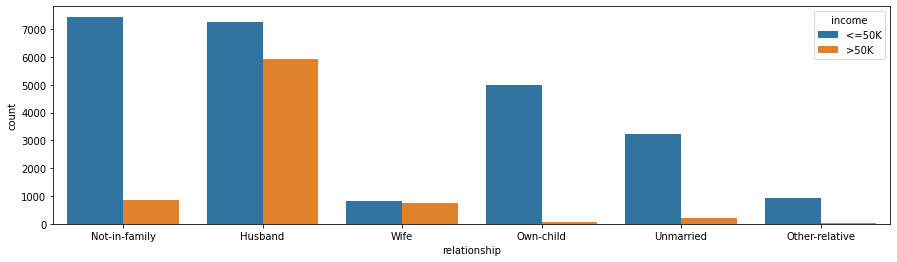

In [ ]:
# relationship column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['relationship'].dtype)
print("Missing values are", train_data['relationship'].isnull().sum())
print(train_data['relationship'].value_counts())
train_data['relationship'] = train_data['relationship'].str.lstrip()

plt.figure(figsize=(15,4))
sns.countplot(x='relationship', data=train_data, hue='income')
plt.show()

Train data
Datatype is object
Missing values are 0
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


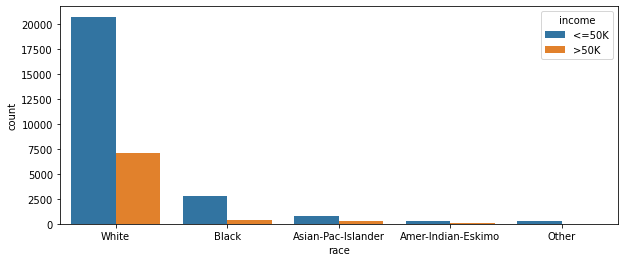

In [ ]:
# race column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['race'].dtype)
print("Missing values are", train_data['race'].isnull().sum())
print(train_data['race'].value_counts())
train_data['race'] = train_data['race'].str.lstrip()

plt.figure(figsize=(10,4))
sns.countplot(x='race', data=train_data, hue='income')
plt.show()


Train data
Datatype is object
Missing values are 0
 Male      21790
 Female    10771
Name: sex, dtype: int64


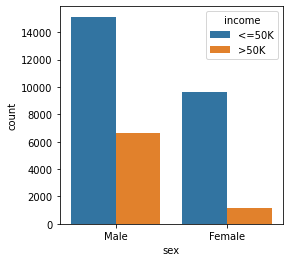

In [ ]:
# sex column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['sex'].dtype)
print("Missing values are", train_data['sex'].isnull().sum())
print(train_data['sex'].value_counts())
train_data['sex'] = train_data['sex'].str.lstrip()

plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=train_data, hue='income')
plt.show()

Train data
Datatype is object
Missing values are 0
 United-States                 29170
 Mexico                          643
Not Known                        583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua              

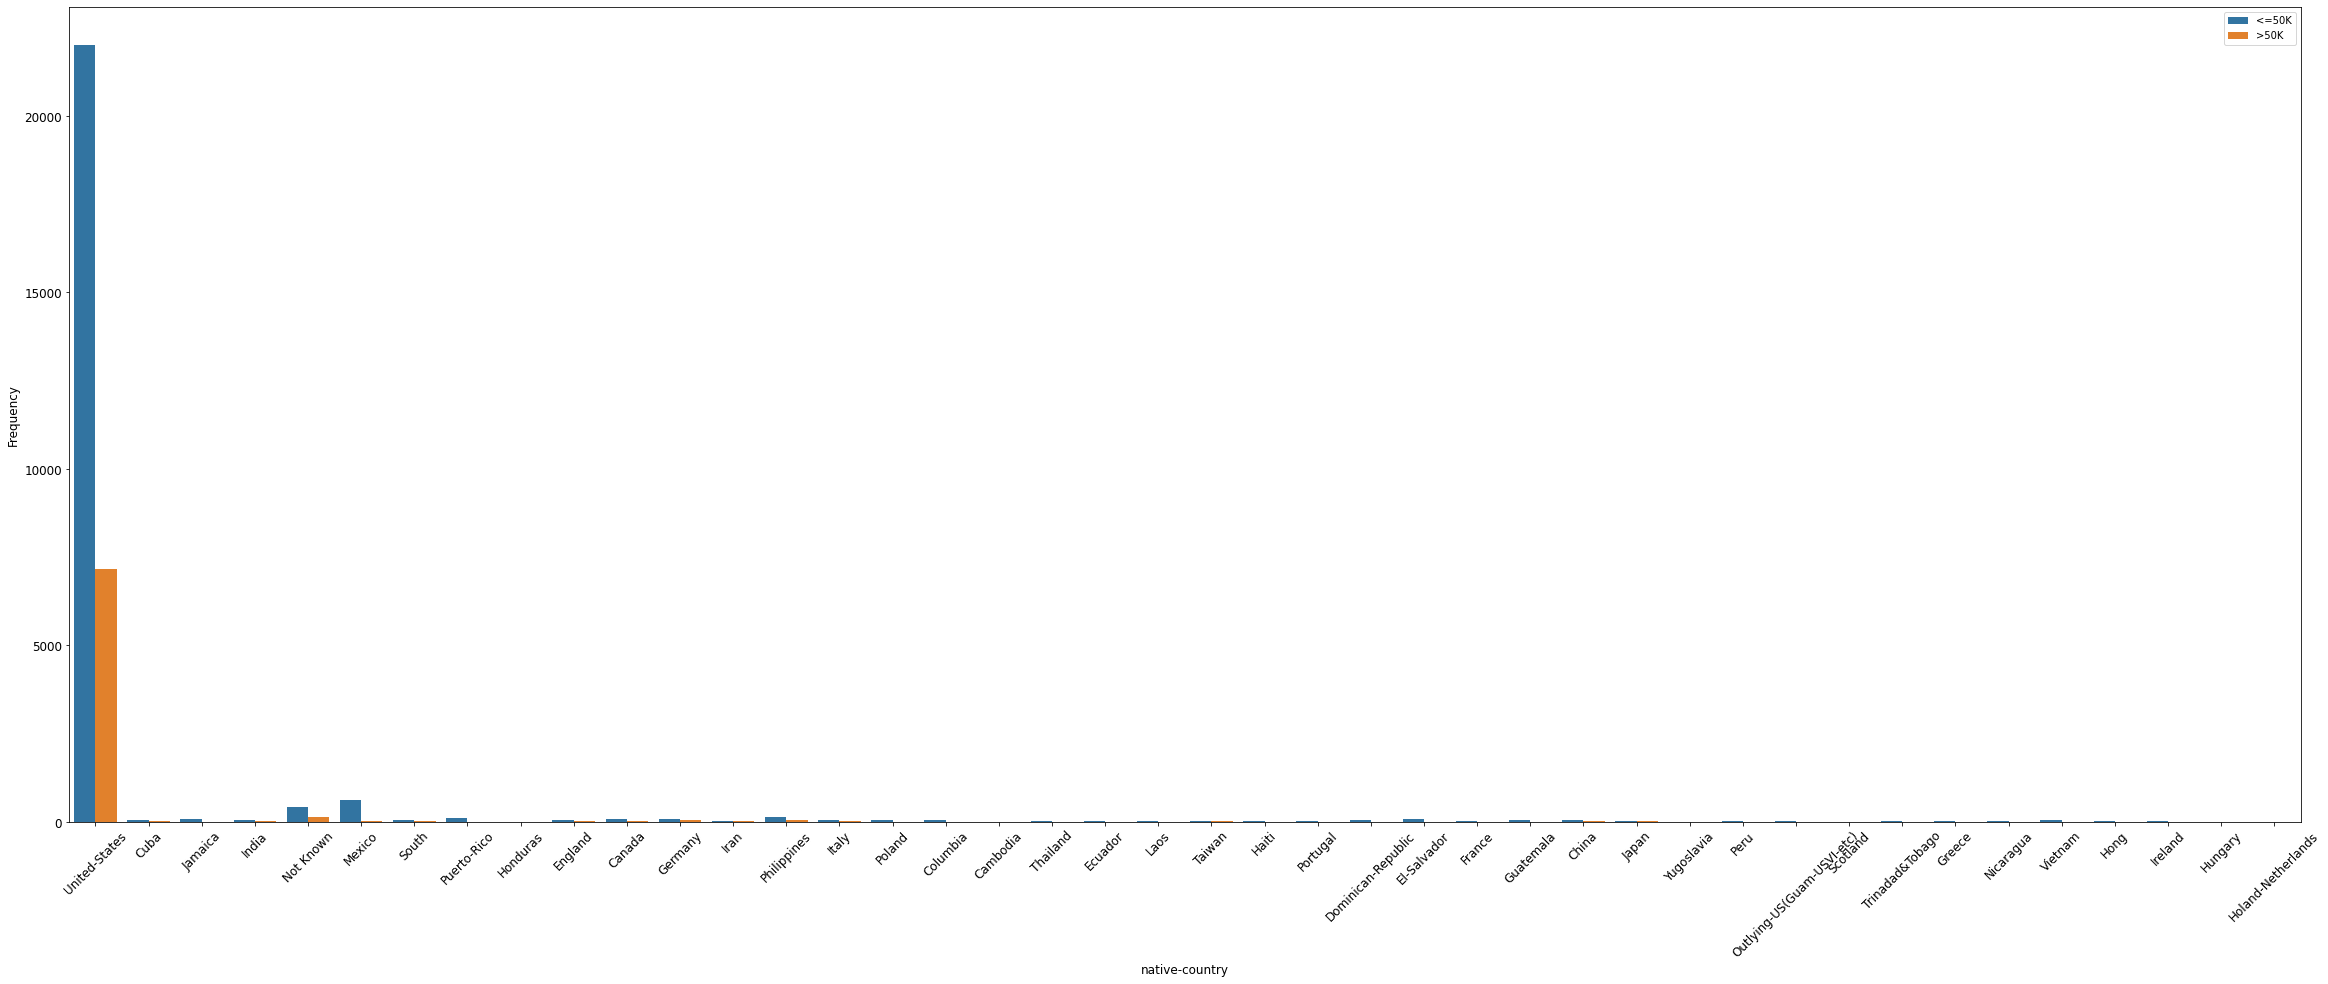

In [ ]:
# native-country column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['native-country'].dtype)
print("Missing values are", train_data['native-country'].isnull().sum())
print(train_data['native-country'].value_counts())
train_data['native-country'] = train_data['native-country'].str.lstrip()

plt.figure(figsize=(40,15))
sns.countplot(x='native-country', data=train_data, hue='income')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel("native-country",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.legend(loc='upper right')
plt.show()

Train data
Datatype is object
Missing values are 0
<=50K    24720
>50K      7841
Name: income, dtype: int64


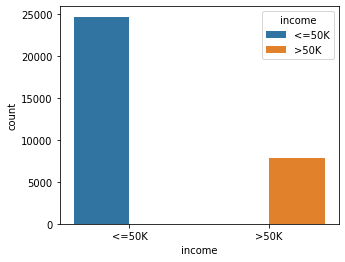

In [ ]:
# income column
print('\033[1m'+ "Train data" + '\033[0m')
print("Datatype is", train_data['income'].dtype)
print("Missing values are", train_data['income'].isnull().sum())
print(train_data['income'].value_counts())
train_data['income'] = train_data['income'].str.lstrip()

plt.figure(figsize=(5,4))
sns.countplot(x='income', data=train_data, hue='income')
plt.show()

`The class of interest is whether the income exceeds $50K/year`
`i.e., Income >50K`. 

`Therefore, mapping the classes of the target variables: <=50K with 0, and >50K with 1`

In [ ]:
# Encoding the classes of the target variable in train and test data with '0' and '1'
train_data['income'] = train_data['income'].replace({'<=50K':0,'>50K':1})
test_data['income'] = test_data['income'].replace({'<=50K':0,'>50K':1})

# Checking the count of classes in the target variable 'income'
print("Train data:")
print(train_data.income.value_counts())

print("\nTest data:")
print(test_data.income.value_counts())

Train data:
0    24720
1     7841
Name: income, dtype: int64

Test data:
0    12435
1     3846
Name: income, dtype: int64


# **Data Preprocessing**

### Correlation Analysis of Numeric Variables using Pearson’s Correlation 


`  From the below heatmap, it can be inferred that there is no high correlation of any numeric attribute with one or more of the other numeric atrributes. This implies that they do not exhibit Multicollinearity and thus, do not need to be removed from the analysis.  `

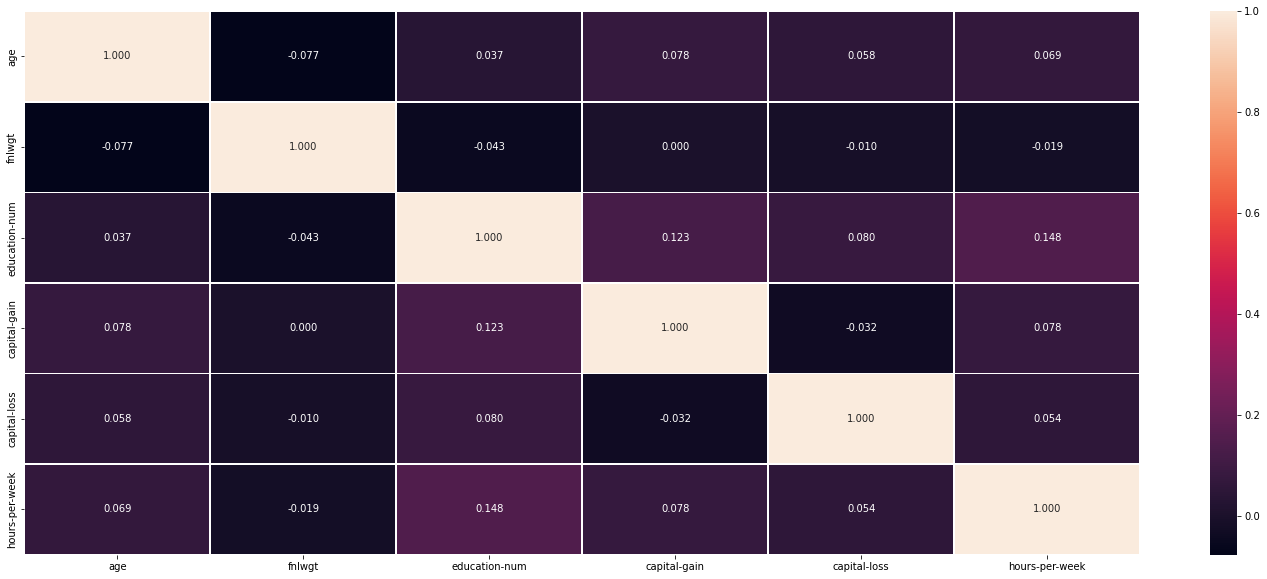

In [ ]:
# Visualizing the correlation amongst Numeric variables using a heatmap
plt.figure(figsize=(25,10))
sns.heatmap(train_data.loc[:,df_train_numerical].corr(), annot=True, linewidths=.5,fmt='.3f')

### Analyzing the Correlation between the continuous predictor variables and the binary target variable `income`

For measuring the relationship between the binary target variable and the continuous variables of this dataset, we make use of the the `PointBiserial Correlation Result` by defining a `Null Hypothesis` and an `Alternate Hypothesis` reagarding the correlation amongst the features under consideration.

1. Null hypothesis `H0`     : the continuous variable and target variable have no correlation between them.
2. Alternate Hypothesis `H1`: the continuous variable and target variable have a correlation between them.

If the p-value is greater than 0.05, we `fail to reject the Null hypothesis` and conclude that the continuous variable considered is not correlated to target variable `income`. 

If the p-value is less than 0.05, we `reject the Null hypothesis` and conclude that the continuous variable considered is correlated to target variable `income`. 


Observations from the results of the `PointBiserial Correlation Result` below:

1. For the numeric variable `fnlwgt`, the p-value is greater than 0.05, we fail to reject the Null Hypothesis and assume that these numeric variables and binary categorical variable `income` are not correlated, as also explained by the correlation values in the result.

2. For all the other numeric variables, since the p-value is less than 0.05, we reject the Null Hypothesis and assume that these numeric variables and binary categorical variable `income` are correlated, as also explained by the correlation values in the result.


In [ ]:
# Checking the correlation of the numeric variables with the target variable 'income' 
# PointBiserial correlation is used to measure the relationship between a binary variable and a continuous variable.
df_train_num = train_data.loc[:,df_train_numerical]
for col in df_train_num:
  print(col, "--->",stats.pointbiserialr(df_train_num[col], train_data['income']), "\n")

age ---> PointbiserialrResult(correlation=0.2340371026488576, pvalue=0.0) 

fnlwgt ---> PointbiserialrResult(correlation=-0.00946255724752922, pvalue=0.08773666108238731) 

education-num ---> PointbiserialrResult(correlation=0.335153952690941, pvalue=0.0) 

capital-gain ---> PointbiserialrResult(correlation=0.22332881819538541, pvalue=0.0) 

capital-loss ---> PointbiserialrResult(correlation=0.1505263117703544, pvalue=2.6865471891044098e-164) 

hours-per-week ---> PointbiserialrResult(correlation=0.2296890656708105, pvalue=0.0) 



`Based on the above evaluation, we drop the variable 'Fnlwgt' and 'Education' from our analysis as 'Fnlwgt' is uncorrelated with target variable income, while 'Education' is a redundant variable, and its substitute 'Education-num' already exists in numeric form.`

In [ ]:
# Dropping the variable 'Fnlwgt' as it is uncorrelated with the target variable 'income' from the train and test data
train_data.drop('fnlwgt', axis=1, inplace=True)
test_data.drop('fnlwgt', axis=1, inplace=True)

# Dropping 'Education' variable as it seems redundant with 'Education-num', which has data as per weightage
train_data.drop('education', axis=1, inplace=True)
test_data.drop('education', axis=1, inplace=True)

# **Feature Engineering**


`The dummy variables were generated for the categorical variables to ensure data is encoded in a binary format for ease of training the different classification model during the model building phase.`

In [ ]:
# Getting the dummy variables for the categorical variables
dummy_train = pd.get_dummies(train_data[['workclass','marital-status', 'occupation', 'relationship','sex','race', 'native-country']])
dummy_test = pd.get_dummies(test_data[['workclass','marital-status', 'occupation', 'relationship','sex','race', 'native-country']])

df_train_num = train_data[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
df_test_num = test_data[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [ ]:
# Adding the results to the master dataframe
df_train = pd.concat([train_data.income,df_train_num, dummy_train], axis=1)
df_test = pd.concat([test_data.income,df_test_num, dummy_test], axis=1)

In [ ]:
# Checking the first 5 observation of the Train data after Label Encoding and creating dummy variables
print("Train data:\n")
df_train.head()

Train data:



,income,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not Known,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not Known,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Not Known,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,39,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,50,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,38,9,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,53,7,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,28,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


`As the data was missing for the native country Netherlands in the test set, a separate column consisting of all 0’s was added as a substitute in the test set.`

In [ ]:
# Adding the column in test data with all 0 values for Native country Netherlands 
Netherlands = np.zeros([df_test.shape[0]])
df_test.insert(64, 'native-country_Holand-Netherlands', Netherlands)

In [ ]:
# Checking the first 5 observation of the Test data after creating dummy variables
print("Test data:\n")
df_test.head()

Test data:



,income,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Not Known,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Not Known,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Not Known
0,0,25,7,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,38,9,0,0,50,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,28,12,0,0,40,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,44,10,7688,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,18,10,0,0,30,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# **Rescaling**

`The data was rescaled using Standardization to ensure equal importance was given to all predictors in terms of variability. `

`We used the function fit_transform() on the train data so that the model learns the parameters for scaling on the train data 
and at the same time we scale the train data. We only used transform() on the test data because we made use of the scaling parameters learned on the train data to scale the test data.`

In [ ]:
scaling = StandardScaler()
df_train_rescaled = scaling.fit_transform(df_train.iloc[:,1:])
df_test_rescaled = scaling.transform(df_test.iloc[:,1:])

df_train_res = pd.DataFrame(df_train_rescaled, index=df_train.iloc[:,1:].index, columns=df_train.iloc[:,1:].columns)
df_test_res = pd.DataFrame(df_test_rescaled, index=df_test.iloc[:,1:].index, columns=df_test.iloc[:,1:].columns)

df_train_res.insert(0,"income",df_train["income"])
df_test_res.insert(0,"income",df_test["income"])

# **SMOTE**

`To deal with the class imbalance problem, the Synthetic Minority Oversampling Technique (SMOTE) was used by oversampling the minority class of the training dataset, which was class 1. `

In [ ]:
x_train = df_train_res.iloc[:,1:df_train_res.shape[1]]
Y_train = df_train_res.iloc[:,0]
x_test = df_test_res.iloc[:,1:df_test_res.shape[1]]
Y_test = df_test_res.iloc[:,0]

In [ ]:
Counter = collections.Counter(Y_train)
print(Counter)

Counter({0: 24720, 1: 7841})


In [ ]:
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, Y_train)

In [ ]:
Counter = collections.Counter(y_train_sm)
print(Counter)

Counter({0: 24720, 1: 24720})


In [ ]:
Counter = collections.Counter(Y_test)
print(Counter)

Counter({0: 12435, 1: 3846})


In [ ]:
train = pd.concat([y_train_sm,x_train_sm], axis=1)
test = pd.concat([Y_test,x_test], axis=1)

In [ ]:
print(train.shape,"\n")
print(test.shape,"\n")

(49440, 92) 

(16281, 92) 



In [ ]:
train.head()

,income,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not Known,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not Known,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,...,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Not Known,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0.030671,1.134739,0.148453,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,-0.24445,-1.516792,-0.188389,-0.290936,4.907700,-0.02074,-0.397508,-0.026587,-0.922841,-0.114037,1.431058,-0.180285,-0.177358,2.763489,-0.016628,-0.379495,-0.377746,-0.17745,-0.209578,-0.255954,-0.244944,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,...,-0.048049,-0.042606,-0.054094,-0.046416,-0.029337,-0.057149,-0.052647,-0.029857,-0.065002,-0.029857,-0.044378,-0.036785,-0.005542,-0.019985,-0.024791,-0.019985,-0.055503,-0.036364,-0.027159,-0.047402,-0.049938,-0.043678,-0.023518,-0.141934,-0.032331,-0.135023,-0.02074,-0.03087,-0.078218,-0.042966,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
1,0,0.837109,1.134739,-0.145920,-0.21666,-2.222153,-0.174295,-0.262097,-0.014664,-0.24445,-1.516792,-0.188389,3.437186,-0.203761,-0.02074,-0.397508,-0.026587,1.083611,-0.114037,-0.698784,-0.180285,-0.177358,-0.361861,-0.016628,-0.379495,2.647285,-0.17745,-0.209578,-0.255954,-0.244944,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,...,-0.048049,-0.042606,-0.054094,-0.046416,-0.029337,-0.057149,-0.052647,-0.029857,-0.065002,-0.029857,-0.044378,-0.036785,-0.005542,-0.019985,-0.024791,-0.019985,-0.055503,-0.036364,-0.027159,-0.047402,-0.049938,-0.043678,-0.023518,-0.141934,-0.032331,-0.135023,-0.02074,-0.03087,-0.078218,-0.042966,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.340954,-0.045408,-0.022173
2,0,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,-0.24445,0.659286,-0.188389,-0.290936,-0.203761,-0.02074,2.515672,-0.026587,-0.922841,-0.114037,-0.698784,-0.180285,-0.177358,-0.361861,-0.016628,-0.379495,-0.377746,-0.17745,4.771494,-0.255954,-0.244944,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,1.708991,-0.17625,...,-0.048049,-0.042606,-0.054094,-0.046416,-0.029337,-0.057149,-0.052647,-0.029857,-0.065002,-0.029857,-0.044378,-0.036785,-0.005542,-0.019985,-0.024791

In [ ]:
test.head()

,income,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Not Known,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Not Known,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Not Known
0,0,-0.995706,-1.197459,-0.145920,-0.21666,-0.035429,-0.174295,-0.262097,-0.014664,4.090813,-1.516792,-0.188389,-0.290936,-0.203761,-0.020740,-0.397508,-0.026587,-0.922841,-0.114037,1.431058,-0.180285,-0.177358,-0.361861,-0.016628,-0.379495,-0.377746,-0.177450,-0.209578,3.906947,-0.244944,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,-0.825333,-0.585141,-0.17625,...,-0.048049,-0.042606,-0.054094,-0.046416,-0.029337,-0.057149,-0.052647,-0.029857,-0.065002,-0.029857,-0.044378,-0.036785,-0.005542,-0.019985,-0.024791,-0.019985,-0.055503,-0.036364,-0.027159,-0.047402,-0.049938,-0.043678,-0.023518,-0.141934,-0.032331,-0.135023,-0.02074,-0.03087,-0.078218,-0.042966,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,41.385225,-2.932948,-0.045408,-0.022173
1,0,-0.042642,-0.420060,-0.145920,-0.21666,0.774468,-0.174295,-0.262097,-0.014664,4.090813,-1.516792,-0.188389,-0.290936,-0.203761,-0.020740,-0.397508,-0.026587,1.083611,-0.114037,-0.698784,-0.180285,-0.177358,-0.361861,-0.016628,-0.379495,-0.377746,5.635383,-0.209578,-0.255954,-0.244944,-0.335541,-0.067802,-0.381663,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,...,-0.048049,-0.042606,-0.054094,-0.046416,-0.029337,-0.057149,-0.052647,-0.029857,-0.065002,-0.029857,-0.044378,-0.036785,-0.005542,-0.019985,-0.024791,-0.019985,-0.055503,-0.036364,-0.027159,-0.047402,-0.049938,-0.043678,-0.023518,-0.141934,-0.032331,-0.135023,-0.02074,-0.03087,-0.078218,-0.042966,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,41.385225,-2.932948,-0.045408,-0.022173
2,1,-0.775768,0.746039,-0.145920,-0.21666,-0.035429,-0.174295,3.815376,-0.014664,-0.244450,-1.516792,-0.188389,-0.290936,-0.203761,-0.020740,-0.397508,-0.026587,1.083611,-0.114037,-0.698784,-0.180285,-0.177358,-0.361861,-0.016628,-0.379495,-0.377746,-0.177450,-0.209578,-0.255954,-0.244944,-0.335541,-0.067802,2.620110,-0.142608,-0.355316,-0.171279,-0.227104,1.211632,-0.585141,-0.17625,...,-0.048049,-0.042606,-0.054094,-0.046416,-0.029337,-0.057149,-0.0

`Before the model building phase, the dimensions of the training dataset were 49440 instances and 92 attributes. `

# **Model building with evaluation (Accuracy, Precision, Recall)**


` The below functions were used for generating the Confusion Matrix and for evaluating the performance of the models on the train and test data`

In [ ]:
# Function for confusion matrix
def confusion_mat(true, pred):

    classes = np.unique(true)  # extract the different classes
    matrix = np.zeros((len(classes), len(classes)))  # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((true == classes[i]) & (pred == classes[j]))

    conf_df = pd.DataFrame(data=matrix,
                          index=["Actual "+str(classes[0]), "Actual "+str(classes[1])],
                          columns=["Predicted "+str(classes[0]), "Predicted "+str(classes[1])])
    return conf_df



# Function to compute performance evaluation metrics for a binary classification mode
def performanceEval_binary(true, pred):

    _NUMERIC_KINDS = set('buifc')
    true = np.array(true)
    pred = np.array(pred)

    # Checking for the length of both the arrays to be equal
    if(len(true) == len(pred)):

        # Checking if any of the input array is non-numeric
        if (not(true.dtype.kind in _NUMERIC_KINDS) or not(pred.dtype.kind in _NUMERIC_KINDS)):
            print("Non numeric array detected in place of numeric")

        else:
            true_unique = np.sort(np.unique(true))
            pred_unique = np.sort(np.unique(pred))


            # Checking if both the arrays have same classes
            if (np.array_equal(true_unique, pred_unique)):

                # Checking if it is a binary classification
                if(len(true_unique) == 2):


                    confusionMatrix = confusion_mat(true, pred)
                    tp = confusionMatrix.iloc[1, 1]
                    tn = confusionMatrix.iloc[0, 0]
                    fp = confusionMatrix.iloc[0, 1]
                    fn = confusionMatrix.iloc[1, 0]

                    print("\nConfusion Matrix is as follows (class 1 is target class)\n", confusionMatrix)
                    print("\nAccuracy is ", round(((tp+tn)/(tn+fp+fn+tp))*100,2),"%")
                    print("Error is ", round((1-((tp+tn)/(tn+fp+fn+tp)))*100,2),"%")
                    print("Recall is ", round(((tp)/(fn+tp))*100,2),"%")
                    print("Precision is ", round(((tp)/(fp+tp))*100,2),"%")
                else:
                    print("“Non-binary classification result detected")
            else:
                print("Classification present within arrays is different")
    else:
        print("Length of arrays are not same to calculate performance")

In [ ]:
train_df, test_df = np.array(train, dtype=np.float64), np.array(test, dtype=np.float64)   
X_train, y_train= train_df[:,1:], train_df[:,0]
X_test, y_test= test_df[:,1:], test_df[:,0]

# Logistic Regression

It is a parametric classification model that relies on a specific model relating the predictor variables with the target variable, such that the outcome variable is categorical in nature. 

The outcome variable can be modeled as a linear function of the predictors. 

Advantages: 

● Easy to interpret and offers an intuitive explanation of predictors. 

● Computationally fast and cheap to classify large samples of new data. 

Disadvantages: 

● Cannot be used to solve nonlinear problems. 

● Sensitive to outliers and cannot handle missing values. 


In [ ]:
class LogisticRegression_ML:
    def __init__(self, learningRate, tolerance, maxIteration, X_train, X_test, y_train, y_test):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
  
    
    def sigmoid(self, z):
        #print(z)
        sig = 1/(1+np.exp(-z))
        return sig
    

    def costFunction(self, X, y):
        #Negative log likelihood function
        pred_ = np.log(np.ones(X.shape[0])+ np.exp(X.dot(self.w))) - X.dot(self.w).dot(y) 
        cost = pred_.sum()
        return cost
        

    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad
    

    def gradientDescent(self, X, y):
        self.cost_sequences = []
        last_cost = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate* self.gradient(X,y)
            cur_cost = self.costFunction(X,y)
            diff = last_cost - cur_cost
            last_cost = cur_cost
            self.cost_sequences.append(cur_cost)
            if diff<self.tolerance:
                print('The model stopped - converged')
                break
        return 



    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
  
    
    def runModel(self):
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0 # initializing 'w' with 0's
        self.gradientDescent(self.X_train, self.y_train)
        
        #print(self.w)
        y_hat_train = self.predict(self.X_train)
        
        print("\n----------------------------------------------------------")
        print("Evaluation for training data:")
        performanceEval_binary(self.y_train,y_hat_train)

        y_hat_test = self.predict(self.X_test)
      
        print("\n----------------------------------------------------------") 
        print("Evaluation for testing data:")
        performanceEval_binary(self.y_test,y_hat_test)


In [ ]:
lr = LogisticRegression_ML(tolerance = 0.65, learningRate=0.00001, maxIteration=400,
                        X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
answer = lr.runModel()

100%|██████████| 400/400 [00:12<00:00, 31.20it/s]



----------------------------------------------------------
Evaluation for training data:

Confusion Matrix is as follows (class 1 is target class)
             Predicted 0.0  Predicted 1.0
Actual 0.0        17482.0         7238.0
Actual 1.0         1694.0        23026.0

Accuracy is  81.93 %
Error is  18.07 %
Recall is  93.15 %
Precision is  76.08 %

----------------------------------------------------------
Evaluation for testing data:

Confusion Matrix is as follows (class 1 is target class)
             Predicted 0.0  Predicted 1.0
Actual 0.0        10123.0         2312.0
Actual 1.0          814.0         3032.0

Accuracy is  80.8 %
Error is  19.2 %
Recall is  78.84 %
Precision is  56.74 %


#### Bias-Variance Analysis:

`Initially with tolerance = 0.8 and learning rate = 0.001, and maxIterations = 100, we were getting a training error of 12.62%, while the test error was 18.72%. From this we could observe that our model was overfitting, therefore this indicated that there  was low bias and high variance.`

`To tackle the problem of overfitting, we manipulated the learning parameters, and the best parameters that resulted in reducing overfitting were for tolerance = 0.65, learning rate=0.00001, max iterations=400. Therefore, the logistic regression model resulted in 81.93% training accuracy and 80.81% test accuracy. And we can see from the confusion matrix that the model in general fits most of the data points correctly.`


# SVM

SVM uses the idea of identifying a hyperplane that is best to separate the features into different domains. The farther the Support Vector points are from the hyperplane, the higher is the probability of correctly classifying the points in their respective regions or classes. The support vector points are critical in determining the hyperplane because if the position of the vectors changes the hyperplane’s position is also altered. 

Advantages:

● Works well with a clear margin of separation

● Effective in high dimensional spaces

Disadvantages:

● Soft margin SVM had a high computation time and did not work well with our dataset

In [ ]:
class HardMarginSVM_ML:
    
    def __init__(self, X_train, X_test, y_train, y_test, learning_rate = 0.001, lamda = 0.01, n_iters = 200):
        self.learning_rate = learning_rate
        self.lamda = lamda
        self.n_iters = n_iters
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.w = None
        self.b = None


    def fit(self):
        self.y_test = np.where(self.y_test<=0, -1, self.y_test)
        self.y_train = np.where(self.y_train<=0, -1, self.y_train) #convert y values to -1 and +1 
        n_samples, n_features = self.X_train.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for i in range(self.n_iters):
            for idx, x_i in enumerate(self.X_train):
                condition = self.y_train[idx] * (np.dot(x_i, self.w) + self.b) >=1
                
                if condition:
                    self.w = self.w + self.learning_rate *(2 * self.lamda * self.w)
                else:
                    self.w = self.w - self.learning_rate *(2 * self.lamda * self.w - np.dot(x_i, self.y_train[idx]))
                    self.b = self.b - self.learning_rate * (-self.y_train[idx])
    

    def predict(self):
        print("\n----------------------------------------------------------") 
        print("\nEvaluation for training data:")
        approx = np.dot(self.X_train,self.w) + self.b
        y_hat_train = np.sign(approx)
        performanceEval_binary(self.y_train, y_hat_train)
        #print(len(self.y_train))

        print("\n----------------------------------------------------------") 
        print("\nEvaluation for testing data:")
        approx = np.dot(self.X_test,self.w) + self.b
        y_hat_test = np.sign(approx)
        performanceEval_binary(self.y_test,y_hat_test)
        

#### Bias-Variance Analysis:

`Initially with learning_rate =  0.000001, lamda = 0.01, n_iters = 200, we were getting a training error of 19.67%, while the test error was 18.01%. From this we could observe that our model was underfitting, therefore this indicated that there was high bias and low variance, i.e., the model does not generalize the data well.`

`To tackle the problem of underfitting, we manipulated the learning parameters, and the best parameters that resulted in achieving the bias-variance tradeoff, were for learning_rate = 0.001, lamda = 0.01, n_iters = 200. Therefore, the SVM model resulted in 22.56% training error and 22.7% test error. And we can see from the confusion matrix that even though, a few data points were misclassified, the model in general fits most of the data points correctly.`

In [ ]:
clf = HardMarginSVM_ML(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
clf.fit()
clf.predict()


----------------------------------------------------------

Evaluation for training data:

Confusion Matrix is as follows (class 1 is target class)
              Predicted -1.0  Predicted 1.0
Actual -1.0         22061.0         2659.0
Actual 1.0           8493.0        16227.0

Accuracy is  77.44 %
Error is  22.56 %
Recall is  65.64 %
Precision is  85.92 %

----------------------------------------------------------

Evaluation for testing data:

Confusion Matrix is as follows (class 1 is target class)
              Predicted -1.0  Predicted 1.0
Actual -1.0         10349.0         2086.0
Actual 1.0           1610.0         2236.0

Accuracy is  77.3 %
Error is  22.7 %
Recall is  58.14 %
Precision is  51.74 %


# KNN

The  key idea of the k-NN Classification algorithm is the use of similar records in the training data to classify a new record from the test data. The k-nearest neighbors are used to determine the similar records, and then a majority decision rule is used to classify the new record as a member of the majority class of the k-neighbors.

Advantages:

● Simple method, with no parametric assumptions.

● Performs well on large training datasets.

Disadvantages:

● Sensitive to large scale differences and outliers.

● Time-consuming computation involved in finding the distances.

● The number of records required in the training set to qualify as large increases exponentially
with the number of predictors p.

In [ ]:
class KNN:
  def __init__(self, neighbors, X_train, X_test, y_train, y_test):
    self.neighbors = neighbors
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test


#Euclidean Distance
  def eucledian(self,p1,p2):
      dist = np.sqrt(np.sum((p1-p2)**2))
      return dist

  def runModel(self):
    predicted = []

    for test_row in range(len(self.X_test)):
      dist_list=[]
      for train_row in range(len(self.X_train)):
        distances = self.eucledian(self.X_train[train_row] ,self.X_test[test_row]) #Calculating the distance
        dist_list.append(distances)
      dist_list = np.array(dist_list)
      #print(dist_list)

      #Sorting the array while preserving the index#Keeping the first K datapoints
      dist = np.argsort(dist_list)[:self.neighbors]

      #Labels of the K datapoints from above
      target = self.y_train[dist]
         
      #Majority voting
      outcome = mode(target) 
      predicted.append(outcome.mode[0])

    print("\n----------------------------------------------------------")
    print("Evaluation for testing data:")
    performanceEval_binary(self.y_test,predicted)

In [ ]:
knn = KNN(neighbors = 3, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
answer = knn.runModel()


----------------------------------------------------------
Evaluation for testing data:

Confusion Matrix is as follows (class 1 is target class)
             Predicted 0.0  Predicted 1.0
Actual 0.0        10427.0         2008.0
Actual 1.0         2651.0         1195.0

Accuracy is  71.38 %
Error is  28.62 %
Recall is  31.07 %
Precision is  37.31 %


# Neural Networks

Neural networks are models which may be used for a classification or prediction problem. Some
complex neural network models can also be used for deep neural networks or for feature extraction.
The neural network model mimics the neurons present in human brains, as they have properties that
resemble learning and memory based on experience.

Advantages:

● Results in a good predictive performance

● Can tolerate noisy data 

● Capable of capturing highly complicated relationships between predictor variables and the target variable.

Disadvantages:

● Computationally expensive as they require longer runtime for training, which increases as the number of predictors increase

● The structure of the model lacks interpretability.

● Prone to overfitting.


In [ ]:
from keras.layers import Dense
from tensorflow.keras.layers import *
from tensorflow.keras import Model, Sequential

n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(n_features,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=50)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % acc)

Epoch 1/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3872 - accuracy: 0.8179
Epoch 2/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3534 - accuracy: 0.8367
Epoch 3/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3439 - accuracy: 0.8424
Epoch 4/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8450
Epoch 5/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3321 - accuracy: 0.8479
Epoch 6/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3276 - accuracy: 0.8503
Epoch 7/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3242 - accuracy: 0.8512
Epoch 8/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3207 - accuracy: 0.8538
Epoch 9/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.8558
Epoch 10/50
1545/1545 [==============================] - 3s 2ms/step - loss: 0.314